# Test side prior from IBL model

The purpose of this notebook is to test the `log_prior_side()` function from `bfdm.ibmodel` and make sure it's working correctly.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import default_rng

from bfdm.tasks import IBLTask
from bfdm.iblmodel import get_optimal_params, log_prior_side

In [2]:
rng = default_rng(999)

## Create synthetic data

In [3]:
n_trials = 1000
a_true = 0.8
h_true = 0.02
noise_true = 1.0

task = IBLTask(hazard_rate=h_true, noise=noise_true, alpha=a_true, rng=rng)
b, s, x = task.sample_trials(n_trials)

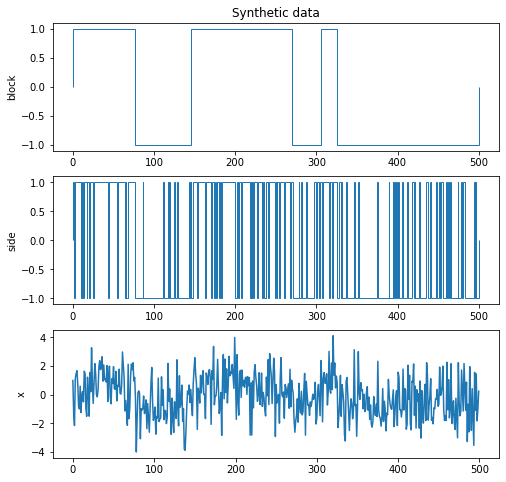

In [4]:
idx = np.s_[0:500]

(fig, ax) = plt.subplots(3, 1, figsize=(8, 8))

ax[0].stairs(b[idx])
ax[0].set_ylabel('block')

ax[1].stairs(s[idx])
ax[1].set_ylabel('side')

ax[2].plot(x[idx])
ax[2].set_ylabel('x')

ax[0].set_title('Synthetic data');

## Compute side prior using optimal parameters

In [5]:
params_opt = get_optimal_params(task)
s_prior = log_prior_side(s, params_opt)

### Filter results

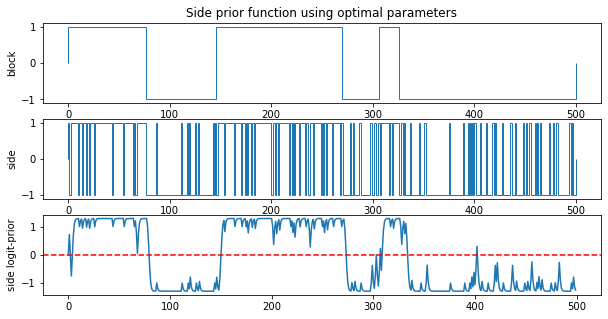

In [9]:
idx = np.s_[0:500]

(fig, ax) = plt.subplots(3, 1, figsize=(10, 5))

ax[0].stairs(b[idx])
ax[0].set_ylabel('block')

ax[1].stairs(s[idx])
ax[1].set_ylabel('side')

ax[2].plot(s_prior[idx])
ax[2].axhline(y=0, color='r', linestyle='--')
ax[2].set_ylabel('side logit-prior')

ax[0].set_title('Side prior function using optimal parameters');